# **Laboratorio 6**
## **Parte 1**

- Derek Arreaga - 22537
- Paula Barillas - 22764
- Mónica Salvatierra - 22249

Enlace de repositorio: https://github.com/FabianKel/MODSIM-LAB6

## **Teoría** | **Parte 1**

Defina y responda

**1. El ELE se encuentra en (S\* = N, I\* = 0). Describa en términos conceptuales por qué este es un estado de "balance" en el sistema. ¿Qué flujos de entrada y salida se están equilibrando exactamente en el compartimento de susceptibles (S) para que su nivel permanezca constante?**

- El equilibrio libre de enfermedad (ELE) ocurre cuando en la población ya no hay individuos infectados, por lo que no se están produciendo nuevos contagios. Aun así, el sistema se mantiene en un estado de balance porque los flujos que aumentan y reducen el número de susceptibles se compensan entre sí. En este caso, las entradas al compartimiento de susceptibles provienen de los nacimientos, mientras que las salidas se deben a las muertes naturales.
<br>
<br>
Como no hay infectados, tampoco hay flujo por infección, y el número total de susceptibles permanece constante. En otras palabras, el sistema está estable porque la tasa con la que nacen nuevos susceptibles es igual a la tasa con la que mueren, sin que se produzcan nuevos contagios que alteren ese equilibrio.

<br>

**2. El equilibrio endémico representa un estado donde la enfermedad persiste de forma estable. Explique la tensión fundamental que existe en este equilibrio. ¿Qué fuerza impulsa el aumento de infecciones y qué fuerza contraria la frena, permitiendo que el número de infectados I\* se mantenga constante y no sea cero?**

- El equilibrio endémico ocurre cuando la enfermedad no desaparece, sino que se mantiene estable dentro de la población. En este punto hay una tensión constante entre dos fuerzas opuestas.
Por un lado, la fuerza que impulsa el aumento de infecciones es el contacto entre personas susceptibles e infectadas: mientras existan susceptibles, los infectados pueden seguir transmitiendo la enfermedad.
<br>
<br>
Por otro lado, la fuerza que frena el crecimiento es la recuperación o muerte de los infectados, ya que reduce el número de personas capaces de contagiar. Cuando ambas fuerzas se equilibran, es decir, cuando la cantidad de nuevos infectados por unidad de tiempo es igual a la cantidad de personas que se recuperan o mueren, el número de infectados se mantiene constante. 

<br>

**3. Imagine que quiere construir un Modelo Basado en Agentes (MBA) que represente la misma dinámica de este modelo SIR. ¿Cómo implementaría los procesos de "nacimiento" (μN) y "muerte natural" (μS, μI, μR) a nivel de agentes individuales? Describa las reglas o eventos que programaría para los agentes.**
<br>
<br>
- En un Modelo Basado en Agentes, cada individuo se representa como un agente con su propio estado y comportamiento. Para incluir los procesos de nacimiento ($\mu N$) y muerte natural ($\mu S, \mu I, \mu R$), se definen reglas que determinan cuándo aparece o desaparece un agente.
<br>
<br>
Por ejemplo, en cada paso del tiempo, cada agente puede tener una probabilidad de morir según su estado (susceptible, infectado o recuperado). De la misma forma, pueden nacer nuevos agentes que se incorporan al sistema como susceptibles. Estas reglas se programan como eventos aleatorios que se ejecutan a nivel individual. Así, el modelo reproduce los mismos procesos del modelo **SIR**, pero con variabilidad entre los agentes. Por ejemplo, algunos pueden morir o nacer en momentos distintos, haciendo que el sistema sea más realista y dinámico.

<br>

**4. Si ejecutara su MBA y graficara el número total de susceptibles contra el número total de infectados (un espacio de estados proyectado), ¿esperaría que las trayectorias se vieran idénticas a las del modelo de ecuaciones diferenciales? ¿Por qué sí o por qué no? Mencione al menos un factor clave inherente a los MBA que introduciría diferencias en el gráfico.**

- Las trayectorias del Modelo Basado en Agentes no serían exactamente iguales a las del modelo de ecuaciones diferenciales. Aunque ambos representan el mismo fenómeno epidemiológico, el MBA introduce variabilidad individual, mientras que el modelo que utiliza ecuaciones diferenciales describe los promedios del comportamiento colectivo.
<br>
<br>
En el modelo de ecuaciones diferenciales, los cambios en las poblaciones susceptibles, infectadas y recuperadas son suaves y continuos, ya que se basan en tasas promedio. En cambio, en el MBA los contagios, muertes y nacimientos ocurren de forma discreta y aleatoria, dependiendo de las interacciones específicas entre los agentes.
<br>
<br>
Por eso, las curvas del MBA tienden a variar y a mostrar diferencias entre corridas, especialmente cuando la población es pequeña. Un factor clave que genera esas diferencias es la estocasticidad de los contactos. En el MBA no todos los individuos interactúan igual ni al mismo tiempo, lo que hace que los resultados sean más realistas, pero también más variables que los del modelo "teórico".

## **Práctica** | **Parte 1**

### **Librerías**

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

### **Parámetros del modelo y R₀ (>1)**

In [7]:
# Parámetros
N = 1000
beta = 0.5 / N 
gamma = 0.1
mu = 0.02

R0 = (beta * N) / (gamma + mu)
print("=== Parámetros del modelo ===")
print(f"N   : {N}")
print(f"β   : {beta:.6f}")
print(f"γ   : {gamma}")
print(f"μ   : {mu}")
print(f"R₀  : {R0:.2f}")

=== Parámetros del modelo ===
N   : 1000
β   : 0.000500
γ   : 0.1
μ   : 0.02
R₀  : 4.17


### **Modelo SIR con dinámica vital**


In [ ]:
def sir_vital(t, y, beta, gamma, mu, N):
    S, I = y
    dSdt = mu*N - (beta)*S*I - mu*S  
    dIdt = (beta)*S*I - (gamma + mu)*I
    return [dSdt, dIdt]

### **Simulación**
Integramos por 300 días para: (S0, I0) = (999, 1) y (700, 300).

In [3]:
t_span = (0, 300)
t_eval = np.linspace(t_span[0], t_span[1], 1501)

# Caso A: brote inicial
sol_A = solve_ivp(
    sir_vital, t_span, [999, 1], t_eval=t_eval, args=(beta, gamma, mu, N), rtol=1e-8, atol=1e-10
)

# Caso B: epidemia mayor
sol_B = solve_ivp(
    sir_vital, t_span, [700, 300], t_eval=t_eval, args=(beta, gamma, mu, N), rtol=1e-8, atol=1e-10
)

S_A, I_A = sol_A.y
S_B, I_B = sol_B.y

print("Integración OK:", sol_A.success and sol_B.success)

Integración OK: True


### **Equilibrios teóricos (ELE y endémico)**

In [4]:
# ELE: (S=N, I=0)
S_ele, I_ele = N, 0

# Endémico (con beta normalizada por N): S* = (gamma+mu)/beta, I* = mu*(N - S*)/(gamma+mu)
S_end = (gamma + mu) / beta
I_end = mu * (N - S_end) / (gamma + mu)

print("ELE:", (S_ele, I_ele))
print("Endémico:", (S_end, I_end))

ELE: (1000, 0)
Endémico: (240.0, 126.66666666666667)


### **Gráfico**

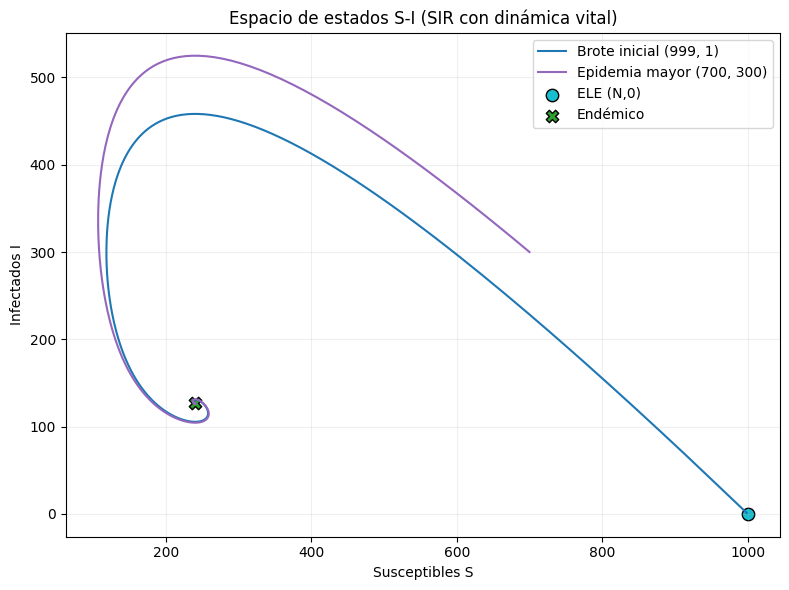

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(S_A, I_A, color="#1f77b4", label="Brote inicial (999, 1)")     
plt.plot(S_B, I_B, color="#9467bd", label="Epidemia mayor (700, 300)")  

# Puntos de equilibrio
plt.scatter([S_ele], [I_ele], color="#17becf", s=80, marker="o", edgecolor="k", label="ELE (N,0)") 
plt.scatter([S_end], [I_end], color="#2ca02c", s=80, marker="X", edgecolor="k", label="Endémico")  

plt.xlabel("Susceptibles S")
plt.ylabel("Infectados I")
plt.title("Espacio de estados S-I (SIR con dinámica vital)")
plt.grid(alpha=0.2)
plt.legend()
plt.tight_layout()
plt.show()

## **Preguntas de Análisis**

**1. Describa el comportamiento de las dos trayectorias que simuló. ¿Convergen al mismo punto? Si es así, ¿a cuál de los dos equilibrios teóricos corresponde este punto de convergencia?**

En este caso se puede observar que ambas trayectorias (brote inicial y epidemia mayor) convergen al mismo punto del espacio de estados, que basicamente corresponde al equilibrio endémico y no al equilibrio Libre de Enfermedad (ELE). Ya que esto ocurre porque con los parámetros utilizados se tiene $R_0 > 1$, por lo que el ELE se infiere que es inestable ya que cualquier presencia de infectados hace que la epidemia crezca y el sistema sea atraído hacia el equilibrio endémico. En nuestra simulación se puede observar que ese punto de convergencia se observa numéricamente cerca de $S* \approx 240$ e $I* \approx 126.67$, lo cual consideramos que coincide con las fórmulas teóricas del equilibrio endémico para el modelo SIR con dinámica vital.

**2. La trayectoria que comienza en I₀=1 muestra un gran arco antes de estabilizarse. ¿Qué representa este arco en términos de la dinámica de una epidemia?**

Consideramos que representa la primera “ola” epidémica. Ya que al principio se puede considerar que   hay muchos susceptibles y muy pocos infectados, en donde la tasa de contagio efectiva es alta y los casos crecen rápidamente (se observa que el arco asciende en $I$ mientras $S$ desciende). Luego, a medida que se consumen susceptibles efectivos ($S$ disminuye) y empiezan a predominar las salidas por recuperación y muerte ($\gamma + \mu$), en donde la curva de infectados alcanza un máximo y empieza a bajar hasta estabilizarse en el equilibrio endémico. Se puede ver que sube y baja de una epidemia con una gran ola inicial antes de asentarse. Por ejemplo, con $(S_0, I_0) = (999, 1)$ se observa un pico más marcado que con **(700, 300)**, porque en el primer caso hay más susceptibles disponibles al inicio.

**3. Su R₀ calculado con los parámetros dados fue mayor que 1. ¿Cómo se alinea el resultado visual de su simulación (el destino final de las trayectorias) con lo que R₀ > 1 predice sobre la persistencia de la enfermedad?**

El resultado visual se alinea completamente con $R_0 > 1$, ya que el ELE no atrae y el sistema termina en un estado con $I* > 0$. Ya que en términos epidemiológicos, $R_0 > 1$ indica que en promedio cada infectado genera más de un nuevo caso cuando la población es mayormente susceptible; y es por eso que la enfermedad no se extingue y se establece de forma endémica. En la simulación, se observa que ambas trayectorias acaban en $(S*, I*) \approx (240, 126.67)$, en donde se confirma que el equilibrio endémico es el atractor y validando lo que predice la teoría para $R_0 > 1$.

**4. Sin volver a ejecutar el código, ¿qué esperaría que sucediera con las trayectorias si se implementara una campaña de salud pública que redujera β a la mitad, haciendo que R₀ sea menor que 1? ¿Hacia qué punto de equilibrio convergerían ahora las trayectorias y por qué?**

Consideramos que si una campaña de salud reduce β lo suficiente como para que $R_0 < 1$, las trayectorias ahora convergerían al ELE ($S = N, I = 0$) extinguiéndose la infección a largo plazo. En donde con $R_0 < 1$ cada infectado en promediono  llega a reemplazarse con un caso nuevo, por lo que los contagios decaen y desaparecen. En este caso si pensamos en  reducir $\beta$ a la mitad, haciendo que $R_0$ sea menor que **1**, bajo esa hipótesis, seguramente el destino sería el ELE, aunque consideramos que sería necesario reducir $\beta$ más de la mitad, por ejemplo a $β = \frac{0.1}{N}$, para que $R_0 \approx 0.83 < 1$. En general en cualquiera de estos escenarios con $R_0 < 1$, la convergencia sería al ELE.


## **Prompt Utilizado**

Uso de ChatGPT

Hola, estoy trabajando en un laboratorio de Modelación y Simulación sobre modelos epidemiológicos SIR con dinámica vital. Necesito apoyo técnico para implementar el sistema de ecuaciones diferenciales en Python usando `scipy.integrate.solve_ivp`, calcular los puntos de equilibrio (ELE y endémico) con los parámetros dados, y visualizar las trayectorias en el espacio de estados (S vs I). También necesito usar `sympy` para calcular la matriz Jacobiana simbólica y sus autovalores en los puntos de equilibrio, para analizar estabilidad."

#### **Por qué funcionó este prompt**

El prompt funcionó porque estableció de manera clara el contexto general del laboratorio sin entrar en detalles específicos del problema. En donde mencionó el tipo de actividad (simulación de modelos epidemiológicos con dinámica vital) y los objetivos técnicos específicos: implementar ecuaciones diferenciales, calcular equilibrios teóricos, y realizar análisis de estabilidad con herramientas simbólicas (sympy) y numéricas (numpy/scipy). Esto permitió que la herramienta proporcionara fragmentos de código precisos y adaptables, incluyendo la estructura de las funciones ODE, el cálculo del Jacobiano, y la visualización en el espacio de estados, sin imponer una solución completa y dejando espacio para adaptaciones según los parámetros del modelo.

## **Referencias**

1. Equilibrio endémico. (s. f.). ScienceDirect. Recuperado 9 de octubre de 2025, de https://www.sciencedirect.com/topics/mathematics/endemic-equilibrium

2. Von Csefalvay, C. (2023). Temporal dynamics of epidemics. In Elsevier eBooks (pp. 217–255). https://doi.org/10.1016/b978-0-32-395389-4.00016-5